# **The Sparks Foundation**
# **Data Analysis and Business Analytics**
# **Task 3: Exploratory Data Analysis - Retails**
# By **Manojit Roy**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

'Libraries imported!'

'Libraries imported!'

## Importing dataset and creating the DataFrame

In [3]:
data = pd.read_excel('/content/drive/MyDrive/EDA Retails/SampleSuperstore.xlsx')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Dictionary 
* *Ship Mode:* Mode of shipping used for shipment delivery
* *Segment:* Customer segment product was shipped to
* *Country*: Country in which the shipment was delivered
* *City:* City in which shipment was delivered
* *State:* State in which the shipment was delivered
* *Postal Code:* Postal Code of the place where the shipment was delivered to
* *Region:* Country Region(eg: east, west, north, south)
* *Category:* The category product belongs to
* *Sub-category:* The sub-category the product belongs to
* *Sales:* Sale made in **USD**
* *Quantity:* Product quantity
* *Discount:* Discount given on the product
* *Profit:* Profit/loss made on the sale
  

In [4]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.shape

(9994, 13)

In [6]:
# checking for Duplicates
data.duplicated().sum()

17

In [7]:
# Removing Duplicates
data = data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Missing Value Detection

In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

* Hence, the dataset doesn't contain any missing value.

## Seggregating columns into groups

In [9]:
ship_mode = ['Ship Mode']
segment = ['Segment']
shipment_location = ['Country', 'Region']
shipment_category = ['Category', 'Sub-Category']
shipment_sale_info = ['Sales', 'Quantity', 'Discount', 'Profit']

## Custom Function for easy and efficient analysis of numerical univariate


In [10]:
def UVA_numeric(data, var_group):
  '''
  Univariate Analysis of numeric columns
  takes a group of variables(Integer and Float)
  and plot/print all the descriptives and properties along with KDE
  runs a loop: calculate all the descriptives of i(th) variable and plot/print it.
  '''

  size = len(var_group)
  plt.figure(figsize=(7*size, 3), dpi=120)

  # looping over each feature
  for j ,i in enumerate(var_group):

    # calculating of descriptives of variables
    minm = data[i].min()
    maxm = data[i].max()
    ran = maxm - minm
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    
    # calculation of points of inflection
    points = mean-st_dev, mean+st_dev

    #plotting the variables with every information
    plt.subplot(1, size, j+1)
    sns.kdeplot(data[i], shade=True)
    sns.scatterplot([minm, maxm], [0,0], color='blue', label='max/min')
    sns.scatterplot([mean], [0], color='green', label='mean')
    sns.scatterplot([median], [0], color='orange', label='median')
    sns.scatterplot(points, [0,0], color='pink', label='points of inflection')
    plt.xlabel(f'{i}')
    plt.ylabel('Density')
    plt.title(f'Point of Inflection={(round(points[0],2), round(points[1],2))}; range={round(ran,2)};\nskewness={round(skew,2)}; kurtosis={round(kurt,2)};; \nmean={round(mean,2)}; median={round(median,2)}')

## Shipment Sales Information

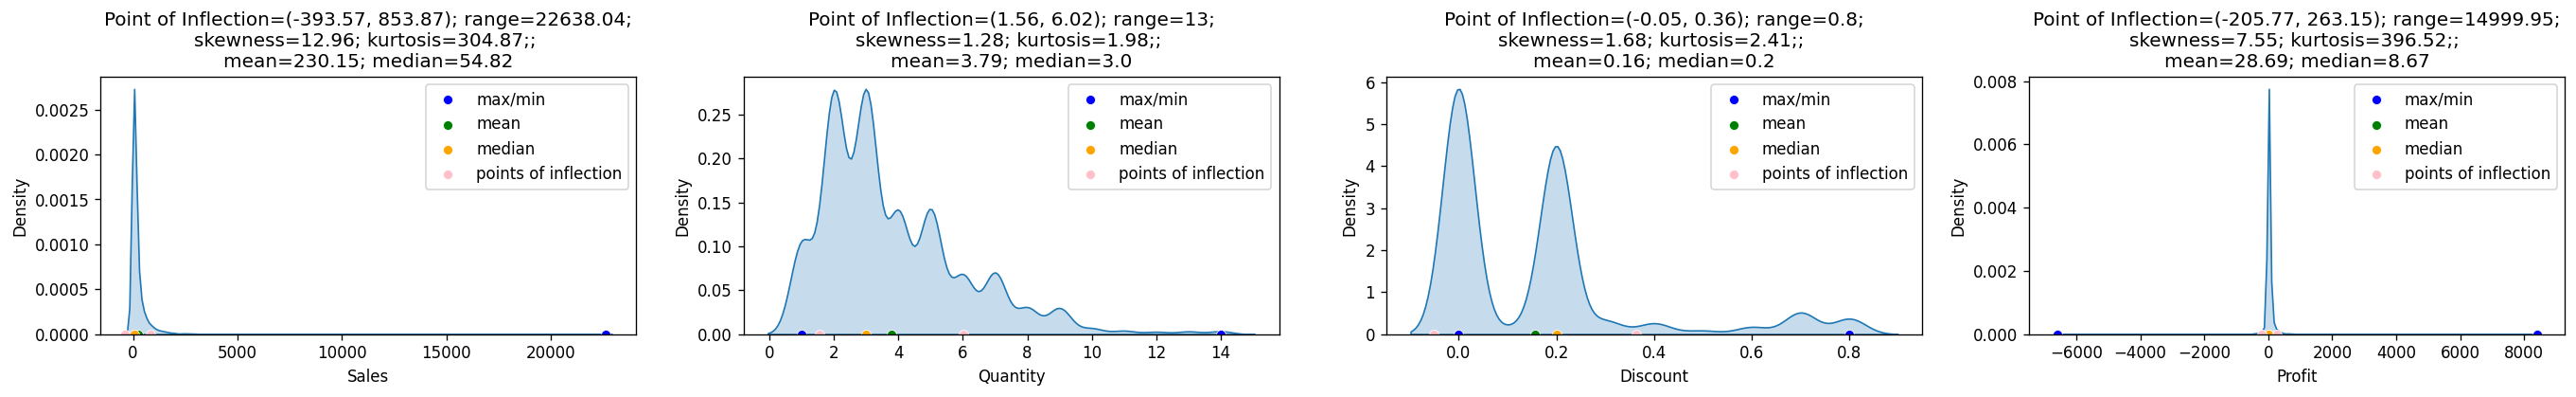

In [11]:
UVA_numeric(data, shipment_sale_info)

## Summary of Shipment Sales Information
* **Sales:**
  * Median Sales = 54.5 USD (approximately)
  * Most of the shipments were occured in within 855 USD
  * There exists a huge difference between the smallest and highest shipment sale price around 22.7k USD
  * The high value of kurtosis suggests that it's a leptokurtic kernel density plot, which represents the values of *Sales* are prone to extreme values especially on the right side.

* **Quantity:**
  * Obviously, there're two heads in the distribution plot, which refers to the fact that mainly the shipment is occured in 2 or quantities(more 25%)
  * The positive value of skewness suggests that this distribution is biased to lower values.
  * It's leptokurtic plot represents that it's prone to extreme values.

* **Discount:**
  * The two heads suggest that mainly two types of discount values can be observed in the dataset. Those are 0.0 and 0.2(20%). 
  * The leptokurtic plot shows that discount values are prone to extreme vslues.

* **Profit:**
  * The mean profit is 28.66 USD
  * The high value of kurtosis suggests that it's leptokurtic and prone to extreme values on the either side.

## Custom Function for easy visualization and analysis of Categorical Values




In [12]:
def UVA_category(data, var_group):
  '''
  Univariate Analysis of Categorical Columns
  Takes a list of category and a DataFrame
  Prints/plots all value_counts and barplot
  '''
  #setting figsize
  size = len(var_group)
  plt.figure(figsize=(9*size, 5), dpi=120)

  for j, i in enumerate(var_group):
    #for counting the unique values
    norm_count = data[i].value_counts(normalize=True)
    n_uni = data[i].nunique()

    #plotting the variable with ebery information 
    plt.subplot(1, size, j+1)
    sns.barplot(norm_count, norm_count.index, order=norm_count.index)
    plt.xlabel(f'Fraction/percent', fontsize=20)
    plt.ylabel(f'{i}', fontsize=10)
    plt.title(f'n_uniques={n_uni}\nValue_counts={norm_count}')

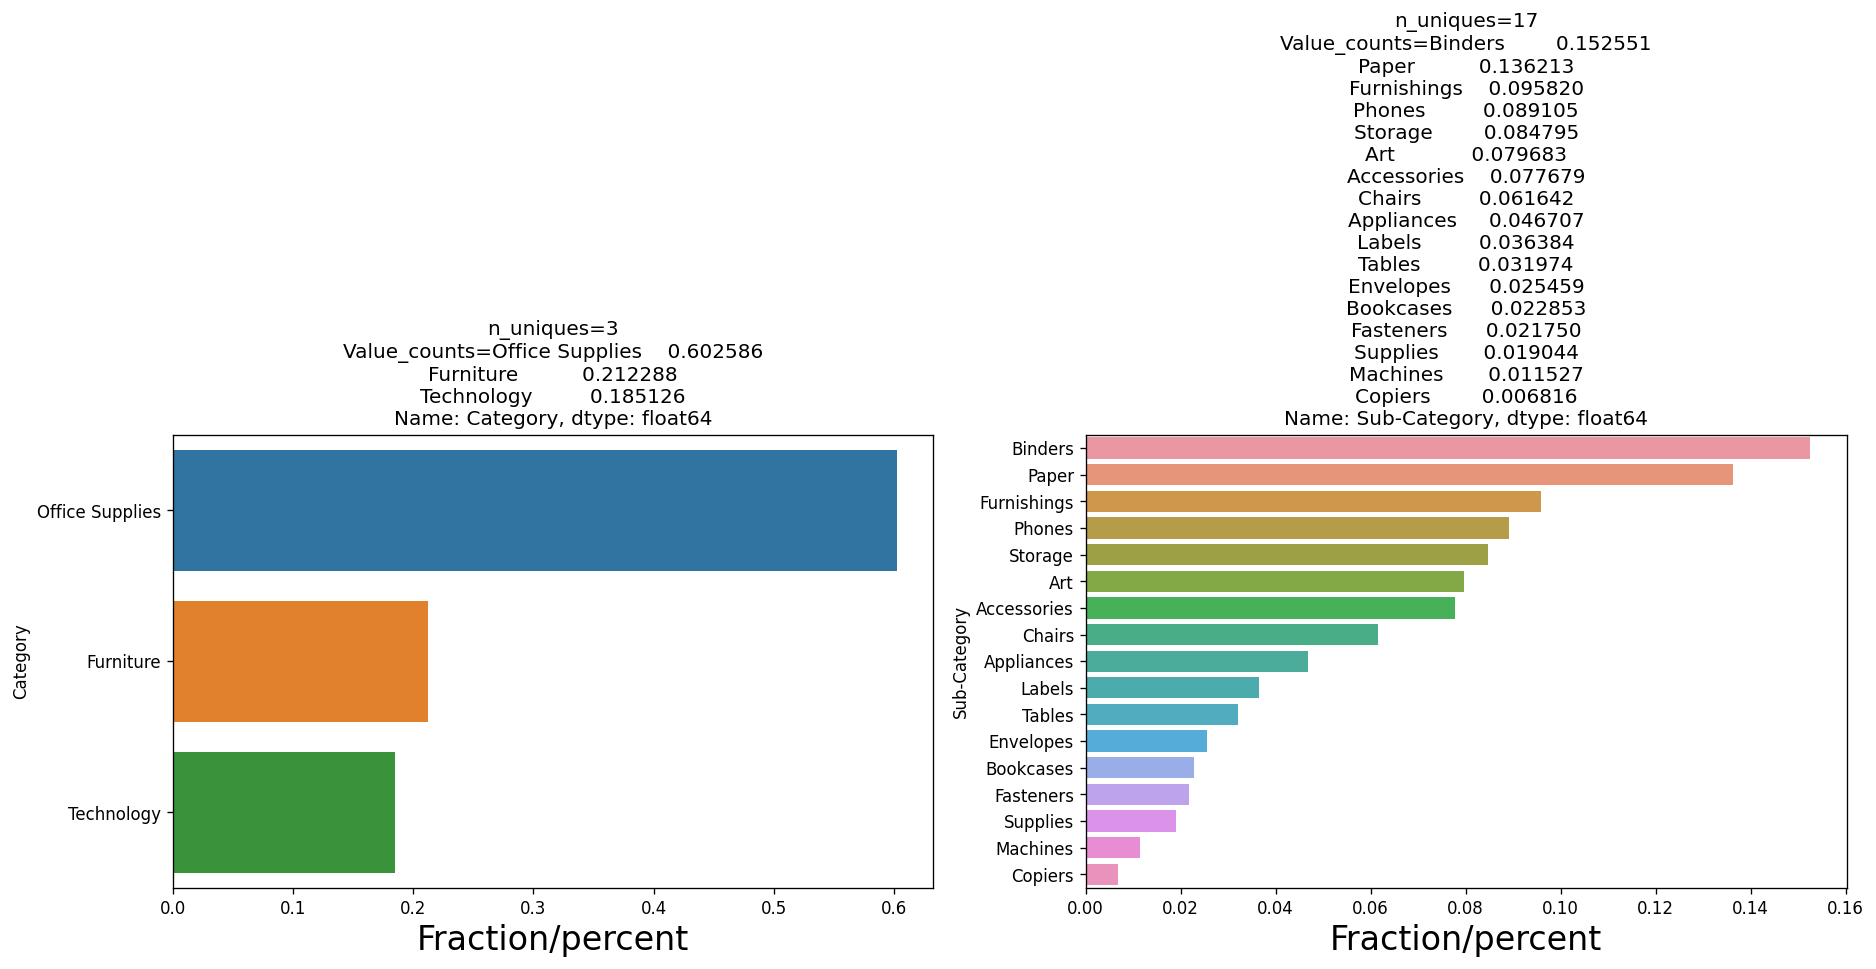

In [13]:
UVA_category(data, shipment_category)

### Summary:
* Mainly, shipment of *Office Supplies* were shipped according to the dataset.
* More than 60% shipment were related to office supplies.
* Mostly, blinders are shipped as per the dataset which supports the data-insights in the barplot the representation of the category feature.
* Copier, which belongs to the shipment related to the category - Technology supports the data-insight represented in the catorgory bar-plot.

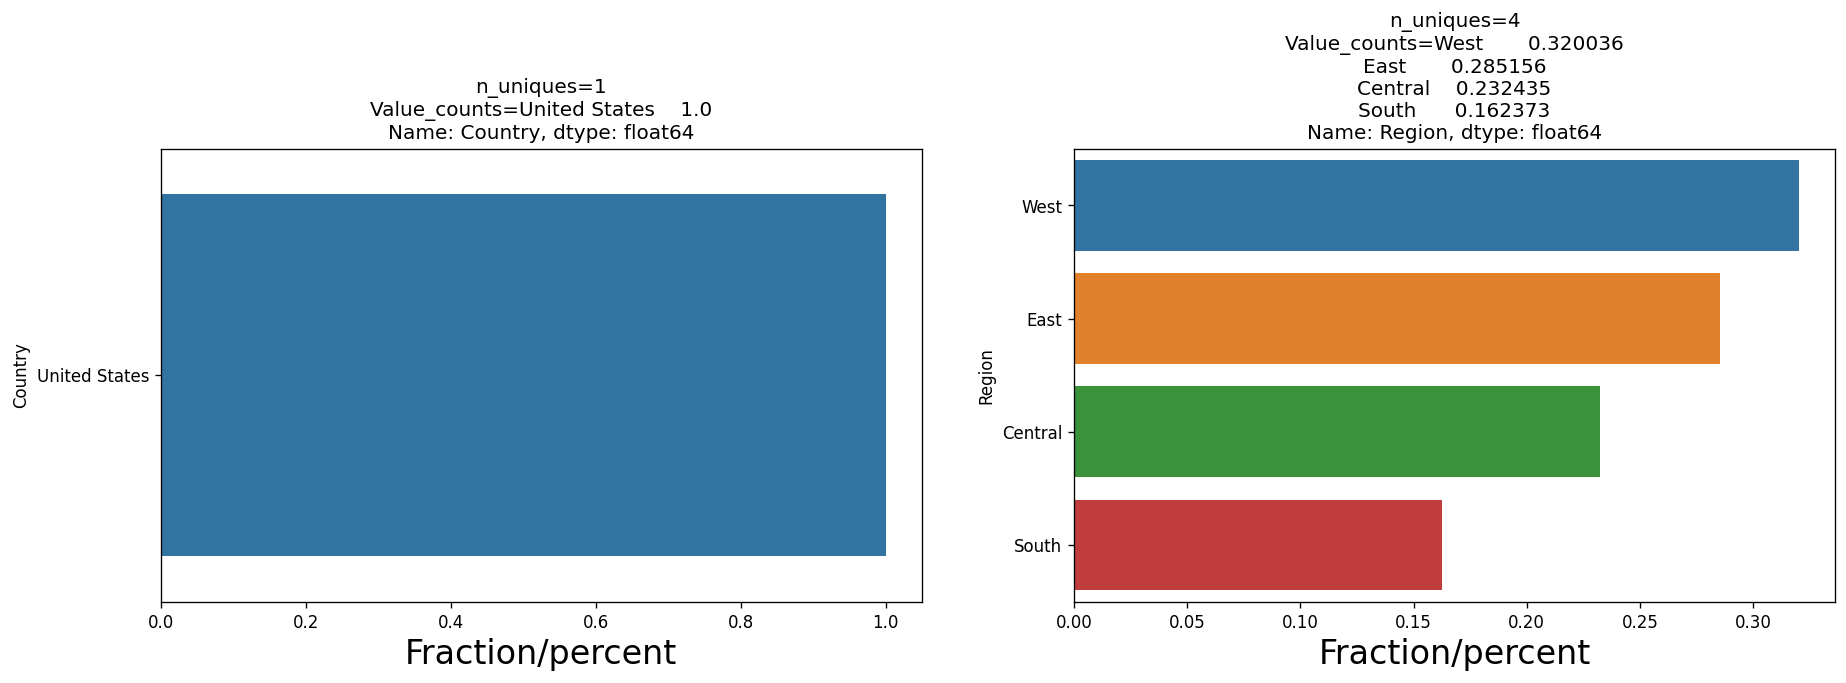

In [14]:
UVA_category(data, shipment_location)

## Summary:
* All the shipment was shipped in United States.
* Most of the shipment was occured in the western region and least occured in southern region.

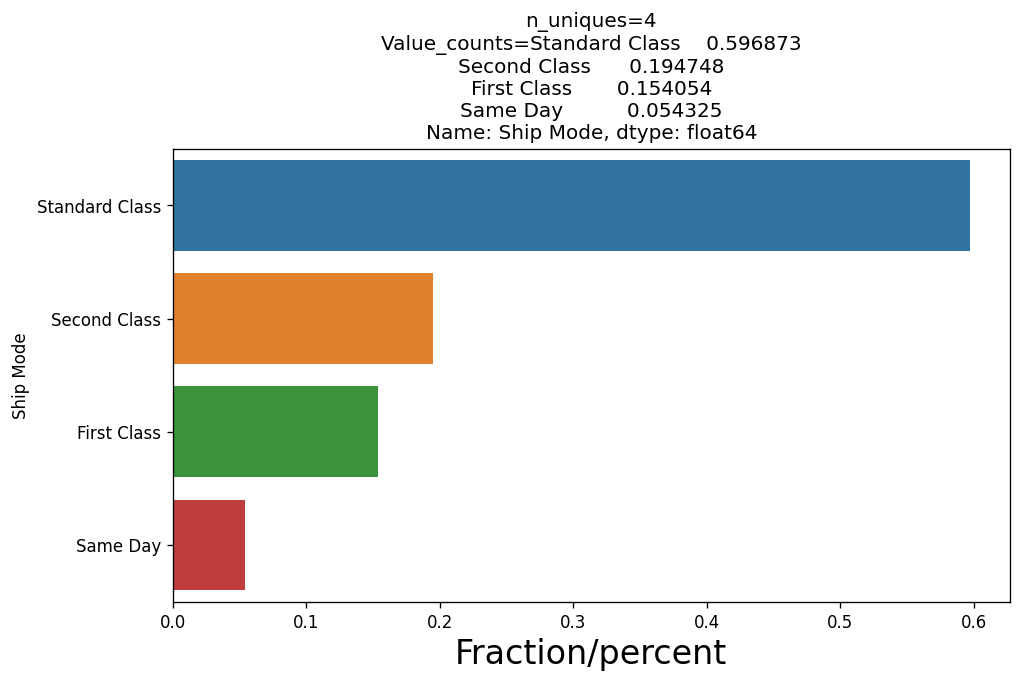

In [15]:
UVA_category(data, ship_mode)

## Summary of Ship Mode:
* We can observe mainly **4 modes of shipment**.
* Most of the shipment was shipped in **Standard Mode**.


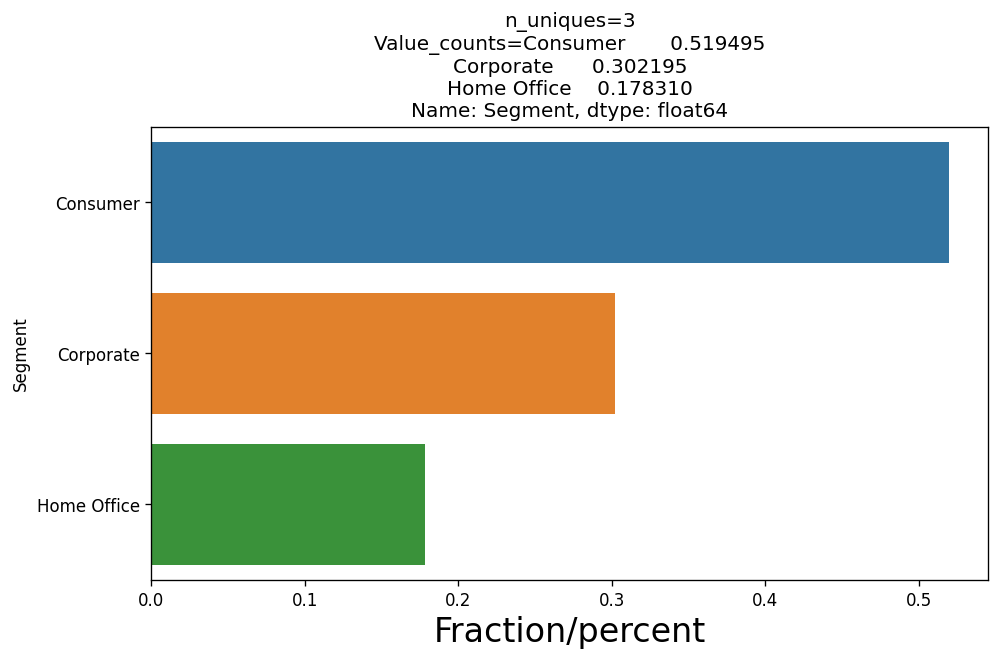

In [16]:
UVA_category(data, segment)

## Summary of Segment
* Obviously, from the bar graph, we can conclude that most of the shipment was shipped to the **Consumer Segment(52%)**
* There exists few corporate and home offices which may explain the the presence of outliers in the distribution of the numerical columns.

## Univariate Analysis: Outliers

I suspect outliers in the *Sales*, *Profit* strongly. The following custom function will detect this easily.

In [17]:
def UVA_outliers(data, var_group, include_outlier=True):

  '''
  Univariate Analysis of outliers
  Takes a group of variables (INTEGER and FLOAT) and plot/print boxplot and descriptives
  Runs a loop: calculate all the descriptives of i(th) varibales and ploot/print it
  data: DataFrame object from which to plot from
  var_group: list of subject columns
  include_outliers(bool): whether to include outliers or not, default = True 
  '''

  size = len(var_group)
  plt.figure(figsize=(7*size, 4), dpi=100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variables
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25 - (1.5*IQR)
    whis_high = quant75 + (1.5*IQR)

    #calculating descriptives of variables
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier:

      #plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i],orient="v")
      plt.ylabel(f'{i}')
      plt.title(f'With outliers\nIQR = {round(IQR,2)}; Median = {round(med,2)}; \n 2nd, 3rd Quartile={(round(quant25,2), round(quant75,2))},\nOutlier(low/high)={(outlier_low,outlier_high)}')

    else:

      #replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1

      #plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel(f'{i}')
      plt.title(f'With outliers\nIQR = {round(IQR,2)}; Median = {round(med,2)}; \n 1st, 3rd Quartile={(round(quant25,2), round(quant75,2))},\nOutlier(low/high)={(outlier_low,outlier_high)}')

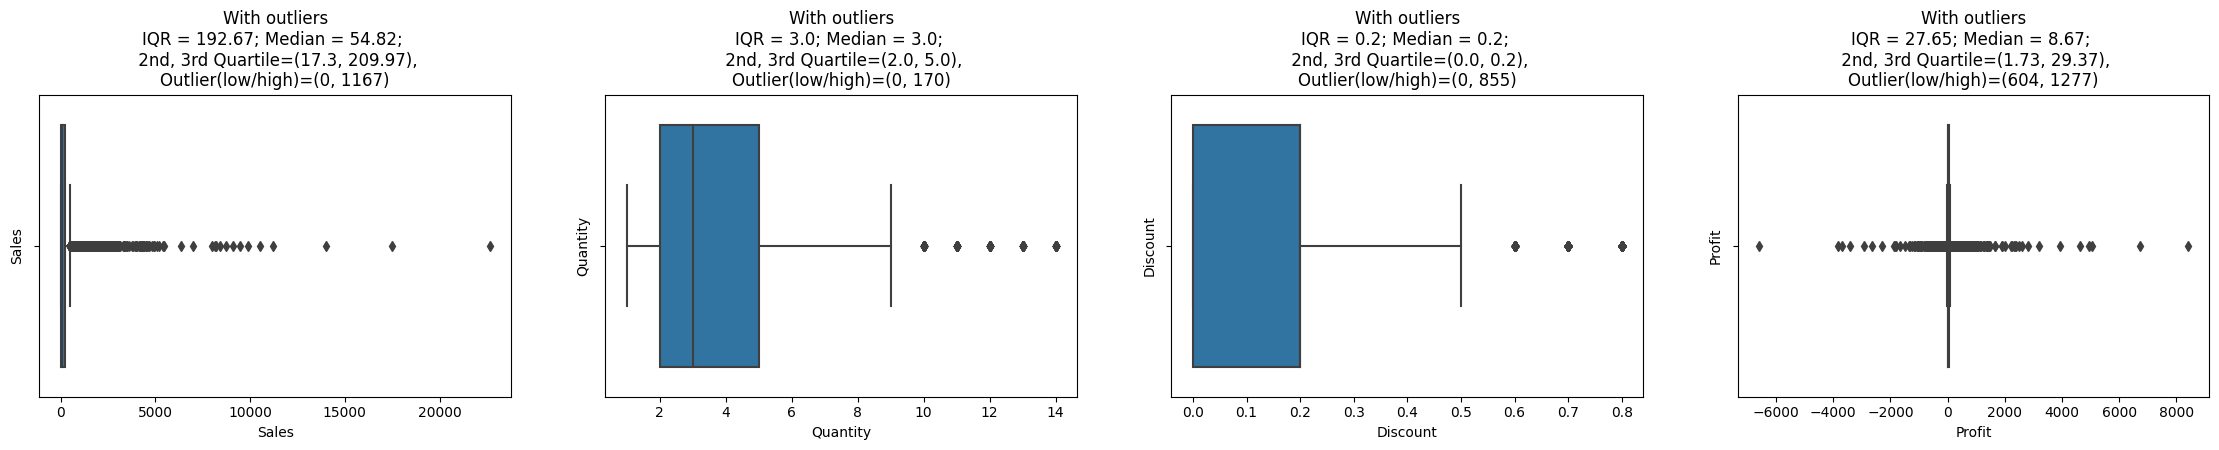

In [18]:
UVA_outliers(data, shipment_sale_info,)

## Summary:
* As expected, the total no. of outliers is higher in **Sales** and **Profit**
* Domains like **Quantity** and **Discount** also have outliers at right side i.e. their values are prone to the extreme values with higher value.
* From the box-plot of profit we can observe existense of the outlier on the either side. The higher value of number of outliers in the right side suggests that more than 67% shipment was shipped with high profit.

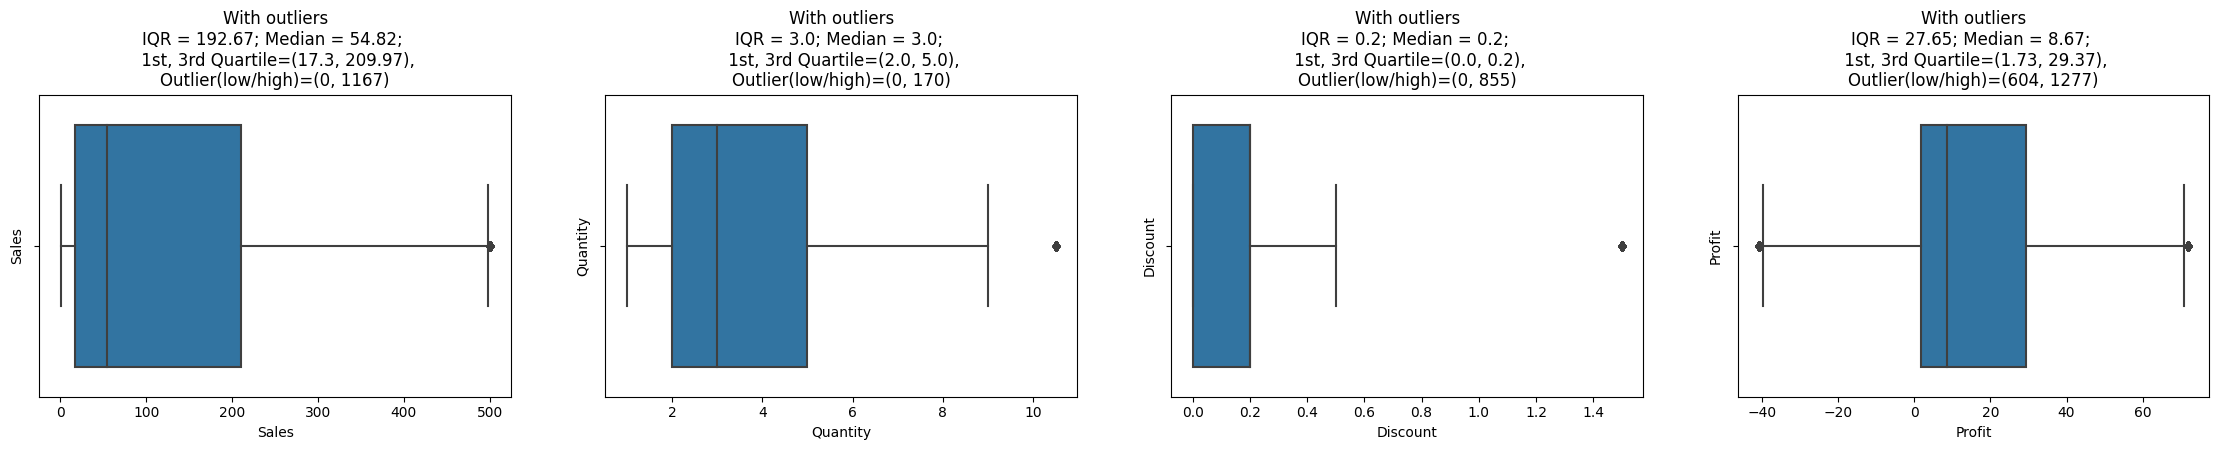

In [19]:
UVA_outliers(data, shipment_sale_info, False)

## Summary:
* In all the four cases, we can observe the median value is close to the 1st quartile which suggests that most of the values are bised towards smaller values.

# Bivariate Analysis



## Numerical Analysis

In [20]:
numerical = data.select_dtypes(include=['int64', 'Int64', 'float64'])
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Postal Code  9977 non-null   int64  
 1   Sales        9977 non-null   float64
 2   Quantity     9977 non-null   int64  
 3   Discount     9977 non-null   float64
 4   Profit       9977 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 467.7 KB


In [21]:
# dropping the Postal Code column from the DataFrame object- numerical
numerical.drop(columns=['Postal Code'], inplace=True)

### Correlation Matrix

In [22]:
correlation = numerical.corr()
correlation

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000



### Heatmap Visualization

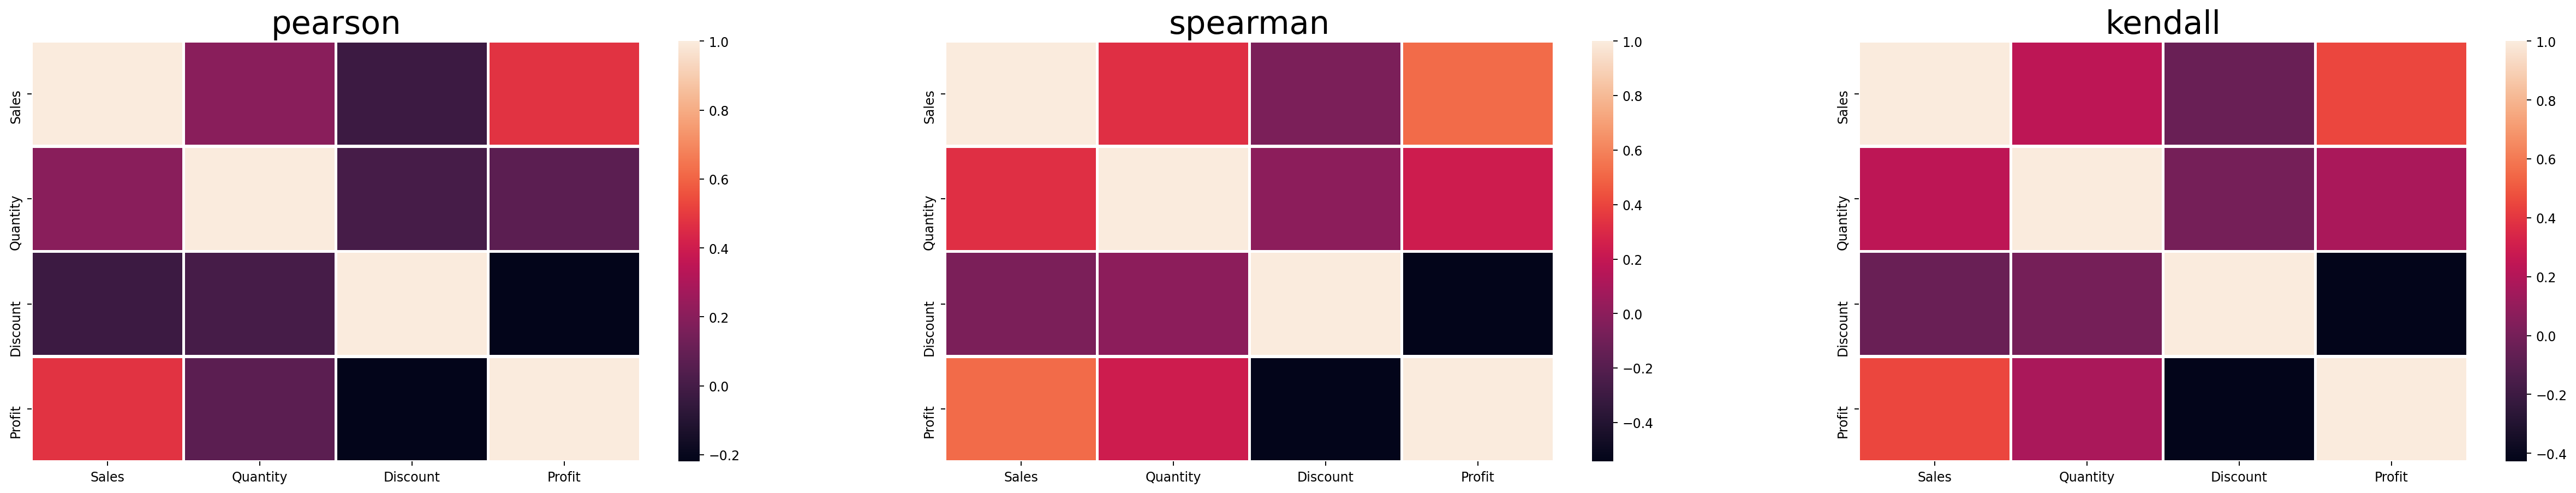

In [23]:
#plotting heatmap using all methods for all numerical variables

plt.figure(figsize=(36,6), dpi=170)
for j,i in enumerate(['pearson', 'spearman', 'kendall']):
  plt.subplot(1,3,j+1)
  correlation = numerical.corr(method=i)
  sns.heatmap(correlation, linewidth=2)
  plt.title(i, fontsize=25)

* **_Summary_**:
  * lower values of the elements in the correlation coefficient suggests that there doesn't exist any strong linear relationship which is supported by the heatmap.

## Categorical Values

### Sales Summary by Sub-Category

---





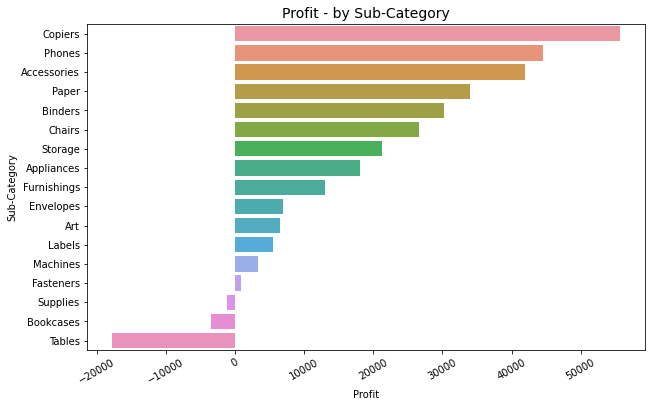

In [24]:
sub = np.round(data.groupby('Sub-Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.figure(figsize=(10,6))
plt.title('Profit - by Sub-Category', fontsize=14)
sns.barplot(sub.Profit, sub.index)
plt.xticks(rotation=30)
plt.show()

#### Summary
* According to the barplot, the most profitable shipment is the shipment of the copiers which is a sub-category under the technology category.
* The least posfitable shipment is the shipment of tables which belongs to the category Office supplies.
* Most of the shipments are profitable.



### State-wise Analysis

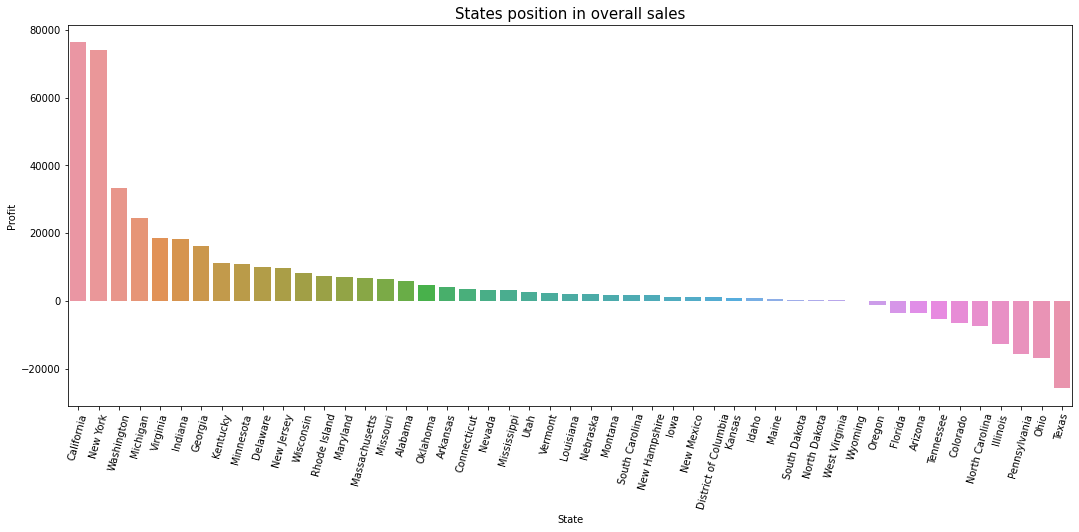

In [25]:
state_P = pd.DataFrame(data.groupby('State').sum()).sort_values('Profit', ascending=False)
plt.figure(figsize=(18,7))
plt.title('States position in overall sales', fontsize=15)
sns.barplot(state_P.index, state_P.Profit)
plt.xticks(rotation=75)
plt.show()

### Summary:
* Obviously, the shipment of California is most profitable. According to the dataset, total $80,000(aaproximately) profit money has been recorded.
* On the other hand, shipments faces loss in the countries like Oregon, Florida, Arizona, Tennessee, Colorado, North Carolina, Iilinois, Pensylvania, Ohio, Texas. 

### Analysis on Sales Loss

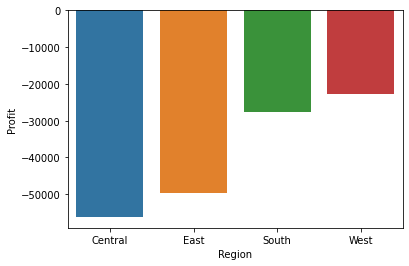

In [26]:
sales_loss = np.round(data[(data.Profit)<0], decimals=2).sort_values('Profit')

region_wise_loss = sales_loss.groupby('Region').sum()
sns.barplot(region_wise_loss.index, region_wise_loss.Profit)
plt.show()

### Summary:
* According to the dataset, the shipments occured in central region faced comparatively more losses than any other regions.
* Opposite case can be seen for western region.

# Multivariate Analysis

In [27]:
data.pivot_table('Quantity', ['Ship Mode', 'Segment'], columns=['Category', 'Sub-Category'], aggfunc='mean')

Category                   Furniture            ... Technology          
Sub-Category               Bookcases    Chairs  ...   Machines    Phones
Ship Mode      Segment                          ...                     
First Class    Consumer     3.384615  3.829268  ...   2.444444  3.575758
               Corporate    4.812500  3.740741  ...   3.444444  3.756098
               Home Office  3.142857  4.529412  ...   4.600000  3.580645
Same Day       Consumer     1.000000  4.150000  ...   3.000000  3.695652
               Corporate    4.000000  4.900000  ...   3.600000  2.714286
               Home Office  3.250000  3.111111  ...   4.000000  3.250000
Second Class   Consumer     3.444444  3.684932  ...   3.600000  3.785714
               Corporate    4.076923  3.357143  ...   3.600000  3.527273
               Home Office  3.625000  4.157895  ...   1.750000  4.055556
Standard Class Consumer     4.118421  3.721649  ...   4.200000  3.762590
               Corporate    4.029412  3.926606  ...   4.625000  3.763314
               Home Office  2.642857  4.018519  ...   3.666667  3.505747

[12 rows x 17 columns]

### Summary:
* On the previous table, the mean values of quantity of shipment are provided in w.r.t. the four categories Shipment Mode, Segment(Index), Category, Sub-Category(columns). Hence, the summary analysis will be carried on using rounded values.
* The shipment mode which was least used is the shipment in the same day.
* Furniture:
  * In case of category Furniture, Most of the furnitures like Bookcases, Chairs, Furnishings, Tables are shipment in the 1st class shipment mode.
  * Most of the cases, the shipments are shipped to the corporates.
  * Least shipments, according to the dataset, are recorded for the Home Office.
* Office Supplies:
  * According to the point of view of segment, we can notice the same result as the previous one.
  * According to the dataset, fasteners and Art items are the primary items that were shiped.
* Technology:
  * Accessories are most shipped product ever recorded and that was shipped to the corporate segment!

In [28]:
data.pivot_table('Quantity', ['Ship Mode', 'Segment'], columns=['Category', 'Sub-Category'], aggfunc='count')

Category                   Furniture                     ... Technology                
Sub-Category               Bookcases Chairs Furnishings  ...    Copiers Machines Phones
Ship Mode      Segment                                   ...                           
First Class    Consumer           26     41          80  ...          5        9     66
               Corporate          16     27          45  ...          4        9     41
               Home Office         7     17          21  ...          3        5     31
Same Day       Consumer            2     20          32  ...          2        3     23
               Corporate           1     10          11  ...          1        5      7
               Home Office         4      9           9  ...          2        2     12
Second Class   Consumer           27     73          99  ...          9        5     84
               Corporate          13     42          53  ...          5        5     55
               Home Office         8     19          32  ...          1        4     36
Standard Class Consumer           76    194         283  ...         19       40    278
               Corporate          34    109         179  ...         10       16    169
               Home Office        14     54         112  ...          7       12     87

[12 rows x 17 columns]

### Summary:
* Mostly 2nd class and standard class products are shipped in high amount w.r.t. the point of view of long run.
* Papers are shipped in the highest amount to the consumer segment.
* In overall point of view, paper, storage, appliances, art(from office supplies category), accessories, phones(from technology category), furnishings(from furniture category)

In [29]:
data.pivot_table(['Sales','Profit','Discount'], ['Ship Mode', 'Segment'], columns=['Category', 'Sub-Category'], aggfunc='mean')

Discount            ...        Sales            
Category                   Furniture            ...   Technology            
Sub-Category               Bookcases    Chairs  ...     Machines      Phones
Ship Mode      Segment                          ...                         
First Class    Consumer     0.219615  0.182927  ...   420.816667  376.209091
               Corporate    0.232500  0.203704  ...  1550.550111  360.156098
               Home Office  0.234286  0.147059  ...  1282.220000  452.247355
Same Day       Consumer     0.175000  0.150000  ...  1417.268000  354.712174
               Corporate    0.000000  0.190000  ...  3188.309400  572.096857
               Home Office  0.125000  0.233333  ...  1302.593000  318.764833
Second Class   Consumer     0.230000  0.158904  ...  2819.198000  370.078976
               Corporate    0.199231  0.152381  ...  1337.233200  293.573418
               Home Office  0.125000  0.184211  ...   427.886000  445.057111
Standard Class Consumer     0.220263  0.175773  ...  1435.192025  380.783993
               Corporate    0.226176  0.162385  ...  1480.880688  332.756201
               Home Office  0.142143  0.164815  ...  3224.268417  402.919241

[12 rows x 51 columns]

In [30]:
data['Postal Code'].describe()

count     9977.000000
mean     55154.964117
std      32058.266816
min       1040.000000
25%      23223.000000
50%      55901.000000
75%      90008.000000
max      99301.000000
Name: Postal Code, dtype: float64

In [31]:
postal_code = pd.cut(data['Postal Code'], [1000, 25_000, 50_000, 75_000, 100_000])
data.pivot_table(['Sales', 'Quantity'], ['Region', postal_code], ['Category', 'Sub-Category'], aggfunc='mean')

Quantity            ...        Sales            
Category                Furniture            ...   Technology            
Sub-Category            Bookcases    Chairs  ...     Machines      Phones
Region  Postal Code                          ...                         
Central (25000, 50000]   2.500000  3.888889  ...  1164.951667  304.791750
        (50000, 75000]   4.052632  4.184615  ...   751.261000  395.275550
        (75000, 100000]  3.888889  3.852459  ...  1503.555692  357.369600
East    (1000, 25000]    3.548387  4.117241  ...  1969.928517  382.133484
        (25000, 50000]   4.000000  3.500000  ...  1122.279750  311.381872
South   (1000, 25000]    4.250000  4.333333  ...  4479.960000  507.119048
        (25000, 50000]   4.142857  3.662162  ...  2963.404667  400.313018
        (50000, 75000]   4.666667  4.200000  ...   479.970000  402.840000
West    (50000, 75000]        NaN       NaN  ...          NaN  222.772000
        (75000, 100000]  3.825000  3.545894  ...  1088.310821  357.232029

[10 rows x 34 columns]

### Quantity, Discount & Profit

In [32]:
QDP_data = data.loc[:, 'Quantity':]

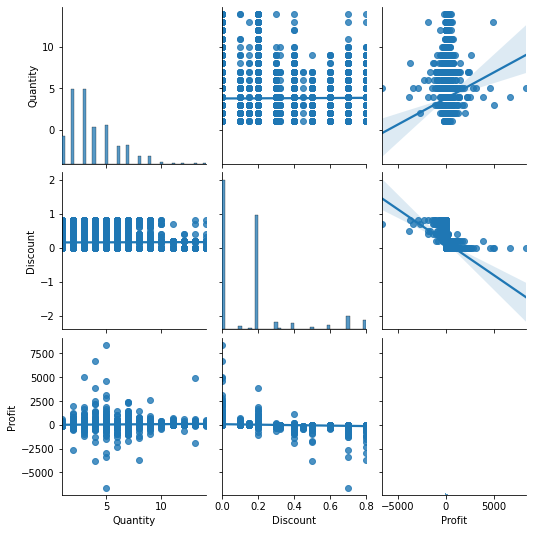

In [33]:
# Pairplot showing dependency of variables
sns.pairplot(QDP_data, kind='reg')
plt.show()

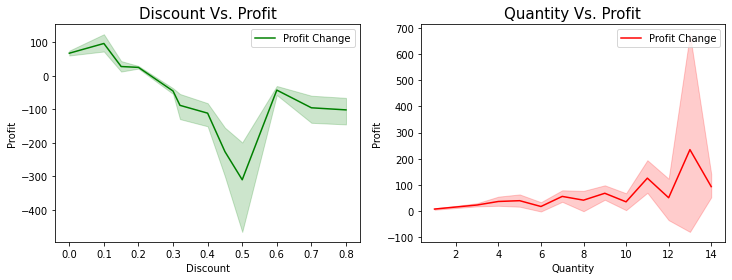

In [34]:
# Analysis on Discount, Quantity & Profit

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].set_title('Discount Vs. Profit', fontsize=15)
ax[1].set_title('Quantity Vs. Profit', fontsize=15)
sns.lineplot(QDP_data.Discount, QDP_data.Profit, color='green', label="Profit Change", ax=ax[0])
sns.lineplot(QDP_data.Quantity, QDP_data.Profit, color='red', label="Profit Change", ax=ax[1])
plt.show()

### Summary:
* Discount Vs. Profit
  * According to our dataset and our plotted line plot, shipment with smaller amount of discount grabs larger amount of profit.
  * For a certain range of discount values, we can notice the negetive profit i.e. loss in the shipment.
  * After a specific threshold value, the profit values rises up and almost saturates at that stage.

* Quantity Vs. Profit
  * We can observe a more or less linear relationship in quantity and profit.
  * A high fluctuation can be seen in case of the shipment with high quantity.

# Overall Summary:
* Sales, Quantity, Discount are bised to the lower values.
* Sales, Quantity, Discount and Profit are generally prone to the extreme values.
* Stuffs categorized under Office Supplies are the most shipped products.
* Blinders are most shipped items and on the other hand Copiers are the least shipped items.
* Most of the shipment occured in the western region and least occured in the southern region.
* Most shipment was shipped in standard mode and to the Consumer Segment(52%)
* There doesn't exist any linear relationship in between Sales, Quantity, Discount and Profit.
* Most profitable shipment is the shipment of Copiers and the least profitable is the shipment of tables though most of the shipments are profitable.
* The shipment in California is most profitable, on the other hand, in the states like Oregon, Florida, Arizona, Tennessee, Colorado, North Carolina, Iillinois, Ohio; high loss-shiopments have been recorded.
* According to our dataset and our plotted line plot, shipment with smaller amount of discount grabs larger amount of profit.
* A high fluctuation of Profit values can be seen in case of the shipment with high quantity.

# Conclusion:
* The product must be sold either with low/no discount or with very high discount to become the best profitable.
* Increament the quantity of the shipment to enhance the profit.
* Maximize the sell of copiers(especially the stuff categorized by the Technology Category), to make the shipments profitable.
* Better minimize supplying furniture(tables and bookcases) and the items in other categories that result in loss.
* Increase the shipment with Home Offices and Corporate segments.
* Texas, Ohio and Illinois should drop or minimize the supply of Furniture(especially tables), and increase the shipment of items of Technology to enhance their profit.